In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import kaepora as kpora
import kaepora_plot as kplot
import spectral_analysis as sa
import scipy.stats as stats
import composite

In [94]:
test_query = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -9 and phase <= -6 and ((dm15_source < 1.4) or (dm15_from_fits < 1.4))"]
spec_array = kpora.grab(test_query[0], 'x1', make_corr=True)

Using: ../data/kaepora_v1.1.db
201 Total Spectra found
4 flagged spectra removed 197 spectra left
0 spectra of peculiar Ias removed 197 spectra left
167 spectra of SNe that have host reddening corrections
Arrays cleaned


In [95]:
def calc_metric(flux1, flux2):
    flux1 = np.asarray(flux1)
    flux2 = np.asarray(flux2)
    m = np.sum((flux1 - flux2)**2.)/len(flux1)
    return m

In [96]:
def compare_spec(spec1, spec2):
    #Things to consider: wavelength range, continuum difference
    output = composite.optimize_scales([spec1], spec2, True, correct=False)
    scale = output[1][0][0]
    waves = np.intersect1d(spec1.wavelength[spec1.x1:spec1.x2], spec2.wavelength[spec2.x1:spec2.x2])
    overlap = (spec1.wavelength > waves[0]) & (spec1.wavelength < waves[-1])
#     chi_sq = stats.chisquare(scale*spec1.flux[overlap],spec2.flux[overlap], ddof=len(spec2.flux[overlap]))
    m = calc_metric(scale*spec1.flux[overlap], spec2.flux[overlap])
    return scale, m

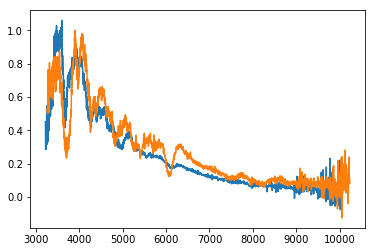

In [97]:
spec1 = spec_array[10]
spec2 = spec_array[20]
output = composite.optimize_scales([spec1], spec2, True, correct=False)
scale = output[1][0]
plt.plot(spec1.wavelength[spec1.x1:spec1.x2],scale*spec1.flux[spec1.x1:spec1.x2])
plt.plot(spec2.wavelength[spec2.x1:spec2.x2],spec2.flux[spec2.x1:spec2.x2])
plt.show()

In [98]:
comparisons = {}
min_range = [4000,7000]
for spec1 in spec_array:
    for spec2 in spec_array:
        waves = np.intersect1d(spec1.wavelength[spec1.x1:spec1.x2], spec2.wavelength[spec2.x1:spec2.x2])
        if len(waves) > 0 and spec1.name != spec2.name and spec2.name + ' ' + spec1.name not in comparisons.keys():
            if (spec1.wavelength[spec1.x1] < min_range[0] and spec1.wavelength[spec1.x2] > min_range[1] and 
                spec2.wavelength[spec2.x1] < min_range[0] and spec2.wavelength[spec2.x2] > min_range[1]):
                print spec1.name + ' ' + spec2.name
                scale, metric = compare_spec(spec1, spec2)
                comparisons[spec1.name + ' ' + spec2.name] = (scale, metric, spec1, spec2)

1991t 1994d
1991t 1994d
1991t 1998dk
1991t 1998ef
1991t 1999dk
1991t 2000fa
1991t 2001eh
1991t 2002cr
1991t 2002dj
1991t 2003fa
1991t 2003kf
1991t 2004ey
1991t 2005el
1991t 2005eq
1991t 2005eu
1991t 2006gr
1991t 2006le
1991t 2006lf
1991t 2007bd
1991t 2007bm
1991t 2007cq
1991t 2007le
1991t 2007qe
1991t 1994d
1991t 1994d
1991t 1995bd
1991t 1995bd
1991t 1997bq
1991t 1997bq
1991t 1997bq
1991t 1997br
1991t 1997br
1991t 1997do
1991t 1997do
1991t 1997dt
1991t 1997dt
1991t 1998ab
1991t 1998aq
1991t 1998dh
1991t 1998dh
1991t 1998es
1991t 1998es
1991t 1999aa
1991t 1999aa
1991t 1999aa
1991t 1999cl
1991t 1999cl
1991t 1999dq
1991t 1999dq
1991t 1999dq
1991t 2001cp
1991t 2001ep
1991t 2001g
1991t 2001v
1991t 2001v
1991t 2002bo
1991t 2002bo
1991t 2002bo
1991t 2002cd
1991t 2002cd
1991t 2002cd
1991t 2002cr
1991t 2002cr
1991t 2002de
1991t 2002dj
1991t 2002dj
1991t 2002dj
1991t 2003cg
1991t 2003cq
1991t 2003du
1991t 2003fa
1991t 2003fa
1991t 2003fa
1991t 2003kc
1991t 2003kf
1991t 2003kf
1991t 2003w
1991t 2

1998ef 2003cg
1998ef 2003du
1998ef 2003du
1998ef 2003du
1998ef 2005cf
1998ef 2005cf
1998ef 2011fe
1998ef 2011fe
1998ef 2011fe
1998ef 2005cf
1998ef 2005cf
1998ef 2011fe
1998ef 2013dy
1999dk 2000fa
1999dk 2001eh
1999dk 2002cr
1999dk 2002dj
1999dk 2003fa
1999dk 2003kf
1999dk 2004ey
1999dk 2005el
1999dk 2005eq
1999dk 2005eu
1999dk 2006gr
1999dk 2006le
1999dk 2006lf
1999dk 2007bd
1999dk 2007bm
1999dk 2007cq
1999dk 2007le
1999dk 2007qe
1999dk 1995bd
1999dk 1995bd
1999dk 1997bq
1999dk 1997bq
1999dk 1997bq
1999dk 1997br
1999dk 1997br
1999dk 1997do
1999dk 1997do
1999dk 1997dt
1999dk 1997dt
1999dk 1998ab
1999dk 1998aq
1999dk 1998dh
1999dk 1998dh
1999dk 1998es
1999dk 1998es
1999dk 1999aa
1999dk 1999aa
1999dk 1999aa
1999dk 1999cl
1999dk 1999cl
1999dk 1999dq
1999dk 1999dq
1999dk 1999dq
1999dk 2001cp
1999dk 2001ep
1999dk 2001g
1999dk 2001v
1999dk 2001v
1999dk 2002bo
1999dk 2002bo
1999dk 2002bo
1999dk 2002cd
1999dk 2002cd
1999dk 2002cd
1999dk 2002cr
1999dk 2002cr
1999dk 2002de
1999dk 2002dj
1999dk 20

2002dj 2006le
2002dj 2006le
2002dj 2006le
2002dj 2006lf
2002dj 2006lf
2002dj 2007bd
2002dj 2007bm
2002dj 2007f
2002dj 2007f
2002dj 2007f
2002dj 2007le
2002dj 2007le
2002dj 2007qe
2002dj 2004ef
2002dj 2005el
2002dj 2005hc
2002dj 2006ax
2002dj 2007a
2002dj 2007bd
2002dj 2007le
2002dj 2002er
2002dj 2002er
2002dj 2003cg
2002dj 2003cg
2002dj 2003cg
2002dj 2003du
2002dj 2003du
2002dj 2003du
2002dj 2005cf
2002dj 2005cf
2002dj 2011fe
2002dj 2011fe
2002dj 2011fe
2002dj 2005cf
2002dj 2005cf
2002dj 2011fe
2002dj 2013dy
2003fa 2003kf
2003fa 2004ey
2003fa 2005el
2003fa 2005eq
2003fa 2005eu
2003fa 2006gr
2003fa 2006le
2003fa 2006lf
2003fa 2007bd
2003fa 2007bm
2003fa 2007cq
2003fa 2007le
2003fa 2007qe
2003fa 1995bd
2003fa 1995bd
2003fa 1997bq
2003fa 1997bq
2003fa 1997bq
2003fa 1997br
2003fa 1997br
2003fa 1997do
2003fa 1997do
2003fa 1997dt
2003fa 1997dt
2003fa 1998ab
2003fa 1998aq
2003fa 1998dh
2003fa 1998dh
2003fa 1998es
2003fa 1998es
2003fa 1999aa
2003fa 1999aa
2003fa 1999aa
2003fa 1999cl
2003fa 199

2005eu 2007le
2005eu 2007qe
2005eu 1995bd
2005eu 1995bd
2005eu 1997bq
2005eu 1997bq
2005eu 1997bq
2005eu 1997br
2005eu 1997br
2005eu 1997do
2005eu 1997do
2005eu 1997dt
2005eu 1997dt
2005eu 1998ab
2005eu 1998aq
2005eu 1998dh
2005eu 1998dh
2005eu 1998es
2005eu 1998es
2005eu 1999aa
2005eu 1999aa
2005eu 1999aa
2005eu 1999cl
2005eu 1999cl
2005eu 1999dq
2005eu 1999dq
2005eu 1999dq
2005eu 2001cp
2005eu 2001ep
2005eu 2001g
2005eu 2001v
2005eu 2001v
2005eu 2002bo
2005eu 2002bo
2005eu 2002bo
2005eu 2002cd
2005eu 2002cd
2005eu 2002cd
2005eu 2002de
2005eu 2003cg
2005eu 2003cq
2005eu 2003du
2005eu 2003kc
2005eu 2003w
2005eu 2003w
2005eu 2003w
2005eu 2004as
2005eu 2004as
2005eu 2004as
2005eu 2004ef
2005eu 2004ef
2005eu 2004ef
2005eu 2004fu
2005eu 2005cf
2005eu 2005iq
2005eu 2006ax
2005eu 2006ax
2005eu 2006cp
2005eu 2006cp
2005eu 2006cz
2005eu 2006gr
2005eu 2006gr
2005eu 2006gr
2005eu 2006le
2005eu 2006le
2005eu 2006le
2005eu 2006lf
2005eu 2006lf
2005eu 2007bd
2005eu 2007bm
2005eu 2007f
2005eu 2007f


2007cq 2002er
2007cq 2003cg
2007cq 2003cg
2007cq 2003cg
2007cq 2003du
2007cq 2003du
2007cq 2003du
2007cq 2005cf
2007cq 2005cf
2007cq 2011fe
2007cq 2011fe
2007cq 2011fe
2007cq 2005cf
2007cq 2005cf
2007cq 2011fe
2007cq 2013dy
2007le 2007qe
2007le 1995bd
2007le 1995bd
2007le 1997bq
2007le 1997bq
2007le 1997bq
2007le 1997br
2007le 1997br
2007le 1997do
2007le 1997do
2007le 1997dt
2007le 1997dt
2007le 1998ab
2007le 1998aq
2007le 1998dh
2007le 1998dh
2007le 1998es
2007le 1998es
2007le 1999aa
2007le 1999aa
2007le 1999aa
2007le 1999cl
2007le 1999cl
2007le 1999dq
2007le 1999dq
2007le 1999dq
2007le 2001cp
2007le 2001ep
2007le 2001g
2007le 2001v
2007le 2001v
2007le 2002bo
2007le 2002bo
2007le 2002bo
2007le 2002cd
2007le 2002cd
2007le 2002cd
2007le 2002de
2007le 2003cg
2007le 2003cq
2007le 2003du
2007le 2003kc
2007le 2003w
2007le 2003w
2007le 2003w
2007le 2004as
2007le 2004as
2007le 2004as
2007le 2004ef
2007le 2004ef
2007le 2004ef
2007le 2004fu
2007le 2005cf
2007le 2005iq
2007le 2006ax
2007le 2006a

1997bq 2002bo
1997bq 2002bo
1997bq 2002cd
1997bq 2002cd
1997bq 2002cd
1997bq 2002de
1997bq 2003cg
1997bq 2003cq
1997bq 2003du
1997bq 2003kc
1997bq 2003w
1997bq 2003w
1997bq 2003w
1997bq 2004as
1997bq 2004as
1997bq 2004as
1997bq 2004ef
1997bq 2004ef
1997bq 2004ef
1997bq 2004fu
1997bq 2005cf
1997bq 2005iq
1997bq 2006ax
1997bq 2006ax
1997bq 2006cp
1997bq 2006cp
1997bq 2006cz
1997bq 2007f
1997bq 2007f
1997bq 2007f
1997bq 2004ef
1997bq 2005hc
1997bq 2006ax
1997bq 2007a
1997bq 2002er
1997bq 2002er
1997bq 2003cg
1997bq 2003cg
1997bq 2003cg
1997bq 2003du
1997bq 2003du
1997bq 2003du
1997bq 2005cf
1997bq 2005cf
1997bq 2011fe
1997bq 2011fe
1997bq 2011fe
1997bq 2005cf
1997bq 2005cf
1997bq 2011fe
1997bq 2013dy
1997bq 1997br
1997bq 1997br
1997bq 1997do
1997bq 1997do
1997bq 1997dt
1997bq 1997dt
1997bq 1998ab
1997bq 1998aq
1997bq 1998dh
1997bq 1998dh
1997bq 1998es
1997bq 1998es
1997bq 1999aa
1997bq 1999aa
1997bq 1999aa
1997bq 1999cl
1997bq 1999cl
1997bq 1999dq
1997bq 1999dq
1997bq 1999dq
1997bq 2001cp

1997dt 2013dy
1998ab 1998aq
1998ab 1998dh
1998ab 1998dh
1998ab 1998es
1998ab 1998es
1998ab 1999aa
1998ab 1999aa
1998ab 1999aa
1998ab 1999cl
1998ab 1999cl
1998ab 1999dq
1998ab 1999dq
1998ab 1999dq
1998ab 2001cp
1998ab 2001ep
1998ab 2001g
1998ab 2001v
1998ab 2001v
1998ab 2002bo
1998ab 2002bo
1998ab 2002bo
1998ab 2002cd
1998ab 2002cd
1998ab 2002cd
1998ab 2002de
1998ab 2003cg
1998ab 2003cq
1998ab 2003du
1998ab 2003kc
1998ab 2003w
1998ab 2003w
1998ab 2003w
1998ab 2004as
1998ab 2004as
1998ab 2004as
1998ab 2004ef
1998ab 2004ef
1998ab 2004ef
1998ab 2004fu
1998ab 2005cf
1998ab 2005iq
1998ab 2006ax
1998ab 2006ax
1998ab 2006cp
1998ab 2006cp
1998ab 2006cz
1998ab 2007f
1998ab 2007f
1998ab 2007f
1998ab 2004ef
1998ab 2005hc
1998ab 2006ax
1998ab 2007a
1998ab 2002er
1998ab 2002er
1998ab 2003cg
1998ab 2003cg
1998ab 2003cg
1998ab 2003du
1998ab 2003du
1998ab 2003du
1998ab 2005cf
1998ab 2005cf
1998ab 2011fe
1998ab 2011fe
1998ab 2011fe
1998ab 2005cf
1998ab 2005cf
1998ab 2011fe
1998ab 2013dy
1998aq 1998dh
19

1999cl 2001cp
1999cl 2001ep
1999cl 2001g
1999cl 2001v
1999cl 2001v
1999cl 2002bo
1999cl 2002bo
1999cl 2002bo
1999cl 2002cd
1999cl 2002cd
1999cl 2002cd
1999cl 2002de
1999cl 2003cg
1999cl 2003cq
1999cl 2003du
1999cl 2003kc
1999cl 2003w
1999cl 2003w
1999cl 2003w
1999cl 2004as
1999cl 2004as
1999cl 2004as
1999cl 2004ef
1999cl 2004ef
1999cl 2004ef
1999cl 2004fu
1999cl 2005cf
1999cl 2005iq
1999cl 2006ax
1999cl 2006ax
1999cl 2006cp
1999cl 2006cp
1999cl 2006cz
1999cl 2007f
1999cl 2007f
1999cl 2007f
1999cl 2004ef
1999cl 2005hc
1999cl 2006ax
1999cl 2007a
1999cl 2002er
1999cl 2002er
1999cl 2003cg
1999cl 2003cg
1999cl 2003cg
1999cl 2003du
1999cl 2003du
1999cl 2003du
1999cl 2005cf
1999cl 2005cf
1999cl 2011fe
1999cl 2011fe
1999cl 2011fe
1999cl 2005cf
1999cl 2005cf
1999cl 2011fe
1999cl 2013dy
1999cl 1999dq
1999cl 1999dq
1999cl 1999dq
1999cl 2001cp
1999cl 2001ep
1999cl 2001g
1999cl 2001v
1999cl 2001v
1999cl 2002bo
1999cl 2002bo
1999cl 2002bo
1999cl 2002cd
1999cl 2002cd
1999cl 2002cd
1999cl 2002de
1999c

2002bo 2002cd
2002bo 2002cd
2002bo 2002cd
2002bo 2002de
2002bo 2003cg
2002bo 2003cq
2002bo 2003du
2002bo 2003kc
2002bo 2003w
2002bo 2003w
2002bo 2003w
2002bo 2004as
2002bo 2004as
2002bo 2004as
2002bo 2004ef
2002bo 2004ef
2002bo 2004ef
2002bo 2004fu
2002bo 2005cf
2002bo 2005iq
2002bo 2006ax
2002bo 2006ax
2002bo 2006cp
2002bo 2006cp
2002bo 2006cz
2002bo 2007f
2002bo 2007f
2002bo 2007f
2002bo 2004ef
2002bo 2005hc
2002bo 2006ax
2002bo 2007a
2002bo 2002er
2002bo 2002er
2002bo 2003cg
2002bo 2003cg
2002bo 2003cg
2002bo 2003du
2002bo 2003du
2002bo 2003du
2002bo 2005cf
2002bo 2005cf
2002bo 2011fe
2002bo 2011fe
2002bo 2011fe
2002bo 2005cf
2002bo 2005cf
2002bo 2011fe
2002bo 2013dy
2002cd 2002de
2002cd 2003cg
2002cd 2003cq
2002cd 2003du
2002cd 2003kc
2002cd 2003w
2002cd 2003w
2002cd 2003w
2002cd 2004as
2002cd 2004as
2002cd 2004as
2002cd 2004ef
2002cd 2004ef
2002cd 2004ef
2002cd 2004fu
2002cd 2005cf
2002cd 2005iq
2002cd 2006ax
2002cd 2006ax
2002cd 2006cp
2002cd 2006cp
2002cd 2006cz
2002cd 2007f
200

2002dj 1998es
2002dj 1999aa
2002dj 1999aa
2002dj 1999aa
2002dj 1999cl
2002dj 1999cl
2002dj 1999dq
2002dj 1999dq
2002dj 1999dq
2002dj 2001cp
2002dj 2001ep
2002dj 2001g
2002dj 2001v
2002dj 2001v
2002dj 2002bo
2002dj 2002bo
2002dj 2002bo
2002dj 2002cd
2002dj 2002cd
2002dj 2002cd
2002dj 2002de
2002dj 2003cg
2002dj 2003cq
2002dj 2003du
2002dj 2003fa
2002dj 2003fa
2002dj 2003fa
2002dj 2003kc
2002dj 2003kf
2002dj 2003kf
2002dj 2003w
2002dj 2003w
2002dj 2003w
2002dj 2004as
2002dj 2004as
2002dj 2004as
2002dj 2004ef
2002dj 2004ef
2002dj 2004ef
2002dj 2004fu
2002dj 2005cf
2002dj 2005eq
2002dj 2005eu
2002dj 2005eu
2002dj 2005iq
2002dj 2006ax
2002dj 2006ax
2002dj 2006cp
2002dj 2006cp
2002dj 2006cz
2002dj 2006gr
2002dj 2006gr
2002dj 2006gr
2002dj 2006le
2002dj 2006le
2002dj 2006le
2002dj 2006lf
2002dj 2006lf
2002dj 2007bd
2002dj 2007bm
2002dj 2007f
2002dj 2007f
2002dj 2007f
2002dj 2007le
2002dj 2007le
2002dj 2007qe
2002dj 2004ef
2002dj 2005el
2002dj 2005hc
2002dj 2006ax
2002dj 2007a
2002dj 2007bd
20

2003fa 2007qe
2003fa 2004ef
2003fa 2005el
2003fa 2005hc
2003fa 2006ax
2003fa 2007a
2003fa 2007bd
2003fa 2007le
2003fa 2002er
2003fa 2002er
2003fa 2003cg
2003fa 2003cg
2003fa 2003cg
2003fa 2003du
2003fa 2003du
2003fa 2003du
2003fa 2005cf
2003fa 2005cf
2003fa 2011fe
2003fa 2011fe
2003fa 2011fe
2003fa 2005cf
2003fa 2005cf
2003fa 2011fe
2003fa 2013dy
2003kc 2003w
2003kc 2003w
2003kc 2003w
2003kc 2004as
2003kc 2004as
2003kc 2004as
2003kc 2004ef
2003kc 2004ef
2003kc 2004ef
2003kc 2004fu
2003kc 2005cf
2003kc 2005iq
2003kc 2006ax
2003kc 2006ax
2003kc 2006cp
2003kc 2006cp
2003kc 2006cz
2003kc 2007f
2003kc 2007f
2003kc 2007f
2003kc 2004ef
2003kc 2005hc
2003kc 2006ax
2003kc 2007a
2003kc 2002er
2003kc 2002er
2003kc 2005cf
2003kc 2005cf
2003kc 2011fe
2003kc 2011fe
2003kc 2011fe
2003kc 2005cf
2003kc 2005cf
2003kc 2011fe
2003kc 2013dy
2003kf 2004ey
2003kf 2005el
2003kf 2005eq
2003kf 2005eu
2003kf 2006gr
2003kf 2006le
2003kf 2006lf
2003kf 2007bd
2003kf 2007bm
2003kf 2007cq
2003kf 2007le
2003kf 2007qe


2005eq 2006gr
2005eq 2006gr
2005eq 2006le
2005eq 2006le
2005eq 2006le
2005eq 2006lf
2005eq 2006lf
2005eq 2007bd
2005eq 2007bm
2005eq 2007f
2005eq 2007f
2005eq 2007f
2005eq 2007le
2005eq 2007le
2005eq 2007qe
2005eq 2004ef
2005eq 2005hc
2005eq 2006ax
2005eq 2007a
2005eq 2007bd
2005eq 2007le
2005eq 2002er
2005eq 2002er
2005eq 2003cg
2005eq 2003cg
2005eq 2003cg
2005eq 2003du
2005eq 2003du
2005eq 2003du
2005eq 2005cf
2005eq 2005cf
2005eq 2011fe
2005eq 2011fe
2005eq 2011fe
2005eq 2005cf
2005eq 2005cf
2005eq 2011fe
2005eq 2013dy
2005eu 2006gr
2005eu 2006le
2005eu 2006lf
2005eu 2007bd
2005eu 2007bm
2005eu 2007cq
2005eu 2007le
2005eu 2007qe
2005eu 1995bd
2005eu 1995bd
2005eu 1997bq
2005eu 1997bq
2005eu 1997bq
2005eu 1997br
2005eu 1997br
2005eu 1997do
2005eu 1997do
2005eu 1997dt
2005eu 1997dt
2005eu 1998ab
2005eu 1998aq
2005eu 1998dh
2005eu 1998dh
2005eu 1998es
2005eu 1998es
2005eu 1999aa
2005eu 1999aa
2005eu 1999aa
2005eu 1999cl
2005eu 1999cl
2005eu 1999dq
2005eu 1999dq
2005eu 1999dq
2005eu 200

2006le 2006lf
2006le 2007bd
2006le 2007bm
2006le 2007cq
2006le 2007le
2006le 2007qe
2006le 1995bd
2006le 1995bd
2006le 1997bq
2006le 1997bq
2006le 1997bq
2006le 1997br
2006le 1997br
2006le 1997do
2006le 1997do
2006le 1997dt
2006le 1997dt
2006le 1998ab
2006le 1998aq
2006le 1998dh
2006le 1998dh
2006le 1998es
2006le 1998es
2006le 1999aa
2006le 1999aa
2006le 1999aa
2006le 1999cl
2006le 1999cl
2006le 1999dq
2006le 1999dq
2006le 1999dq
2006le 2001cp
2006le 2001ep
2006le 2001g
2006le 2001v
2006le 2001v
2006le 2002bo
2006le 2002bo
2006le 2002bo
2006le 2002cd
2006le 2002cd
2006le 2002cd
2006le 2002de
2006le 2003cg
2006le 2003cq
2006le 2003du
2006le 2003kc
2006le 2003w
2006le 2003w
2006le 2003w
2006le 2004as
2006le 2004as
2006le 2004as
2006le 2004ef
2006le 2004ef
2006le 2004ef
2006le 2004fu
2006le 2005cf
2006le 2005iq
2006le 2006ax
2006le 2006ax
2006le 2006cp
2006le 2006cp
2006le 2006cz
2006le 2006lf
2006le 2006lf
2006le 2007bd
2006le 2007bm
2006le 2007f
2006le 2007f
2006le 2007f
2006le 2007le
2

2007bm 2001g
2007bm 2001v
2007bm 2001v
2007bm 2002bo
2007bm 2002bo
2007bm 2002bo
2007bm 2002cd
2007bm 2002cd
2007bm 2002cd
2007bm 2002de
2007bm 2003cg
2007bm 2003cq
2007bm 2003du
2007bm 2003kc
2007bm 2003w
2007bm 2003w
2007bm 2003w
2007bm 2004as
2007bm 2004as
2007bm 2004as
2007bm 2004ef
2007bm 2004ef
2007bm 2004ef
2007bm 2004fu
2007bm 2005cf
2007bm 2005iq
2007bm 2006ax
2007bm 2006ax
2007bm 2006cp
2007bm 2006cp
2007bm 2006cz
2007bm 2007f
2007bm 2007f
2007bm 2007f
2007bm 2007le
2007bm 2007le
2007bm 2007qe
2007bm 2004ef
2007bm 2005hc
2007bm 2006ax
2007bm 2007a
2007bm 2007le
2007bm 2002er
2007bm 2002er
2007bm 2003cg
2007bm 2003cg
2007bm 2003cg
2007bm 2003du
2007bm 2003du
2007bm 2003du
2007bm 2005cf
2007bm 2005cf
2007bm 2011fe
2007bm 2011fe
2007bm 2011fe
2007bm 2005cf
2007bm 2005cf
2007bm 2011fe
2007bm 2013dy
2007f 2005hc
2007f 2007a
2007f 2002er
2007f 2002er
2007f 2011fe
2007f 2011fe
2007f 2011fe
2007f 2011fe
2007f 2013dy
2007f 2005hc
2007f 2007a
2007f 2002er
2007f 2002er
2007f 2011fe
2007

2007le 2004as
2007le 2004ef
2007le 2004ef
2007le 2004ef
2007le 2004fu
2007le 2005cf
2007le 2005iq
2007le 2006ax
2007le 2006ax
2007le 2006cp
2007le 2006cp
2007le 2006cz
2007le 2007f
2007le 2007f
2007le 2007f
2007le 2007qe
2007le 2004ef
2007le 2005hc
2007le 2006ax
2007le 2007a
2007le 2002er
2007le 2002er
2007le 2003cg
2007le 2003cg
2007le 2003cg
2007le 2003du
2007le 2003du
2007le 2003du
2007le 2005cf
2007le 2005cf
2007le 2011fe
2007le 2011fe
2007le 2011fe
2007le 2005cf
2007le 2005cf
2007le 2011fe
2007le 2013dy
1994d 1998dk
1994d 1998ef
1994d 1999dk
1994d 2000fa
1994d 2001eh
1994d 2002cr
1994d 2002dj
1994d 2003fa
1994d 2003kf
1994d 2004ey
1994d 2005el
1994d 2005eq
1994d 2005eu
1994d 2006gr
1994d 2006le
1994d 2006lf
1994d 2007bd
1994d 2007bm
1994d 2007cq
1994d 2007le
1994d 2007qe
1994d 1995bd
1994d 1995bd
1994d 1997bq
1994d 1997bq
1994d 1997bq
1994d 1997br
1994d 1997br
1994d 1997do
1994d 1997do
1994d 1997dt
1994d 1997dt
1994d 1998ab
1994d 1998aq
1994d 1998dh
1994d 1998dh
1994d 1998es
1994d

2011fe 2013dy


1 Twinness 0.0005720671550638425
2004ey -7.04085309307
2006ax -8.34039020831


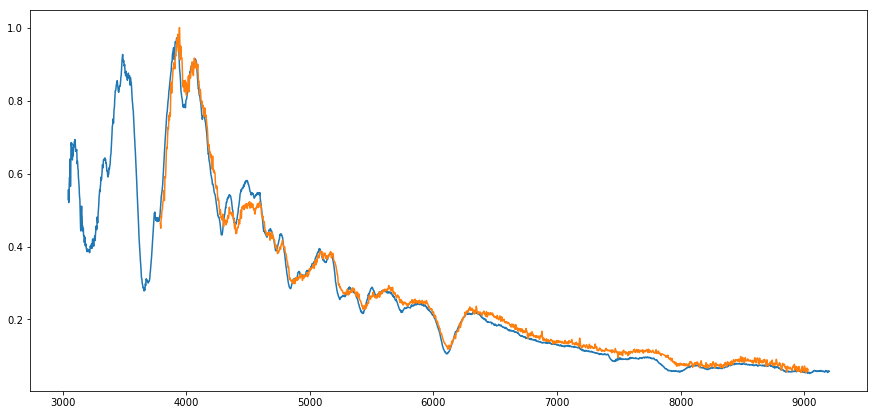

2 Twinness 0.0006016561887989086
1999aa -6.43702997605
2001v -6.52008141727


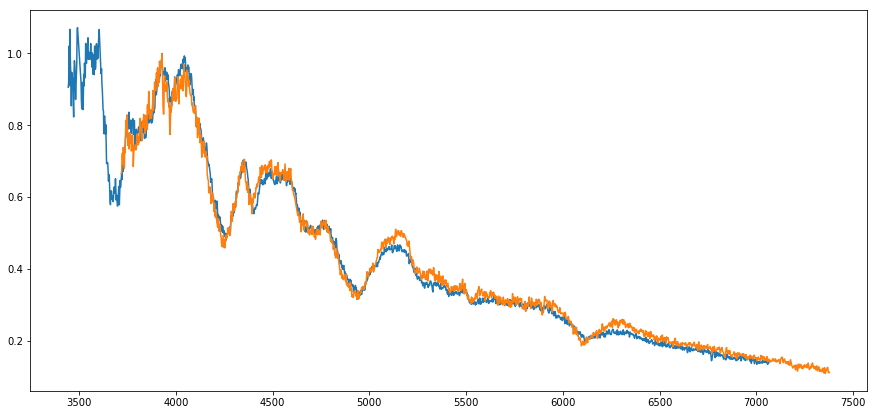

3 Twinness 0.00046721868068233557
2005el -6.73557261252
2011fe -6.9


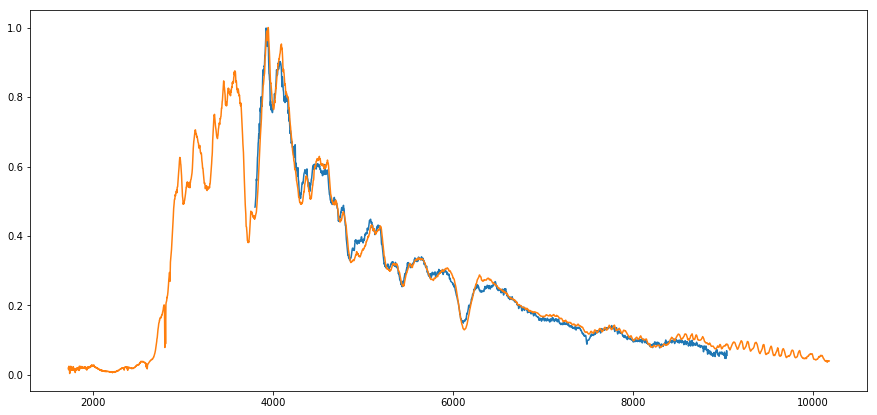

4 Twinness 0.0008084642959208264
2003kf -7.42017971228
2007f -6.60908507402


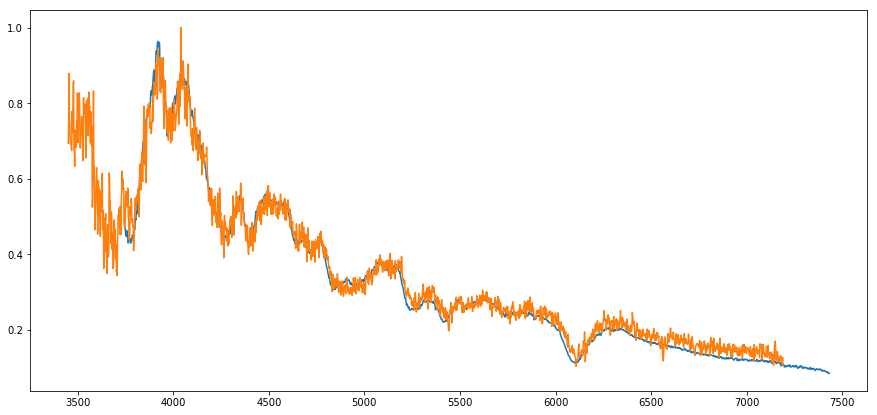

5 Twinness 0.0008971320523828405
2003kf -7.42017971228
2003du -6.3971605272


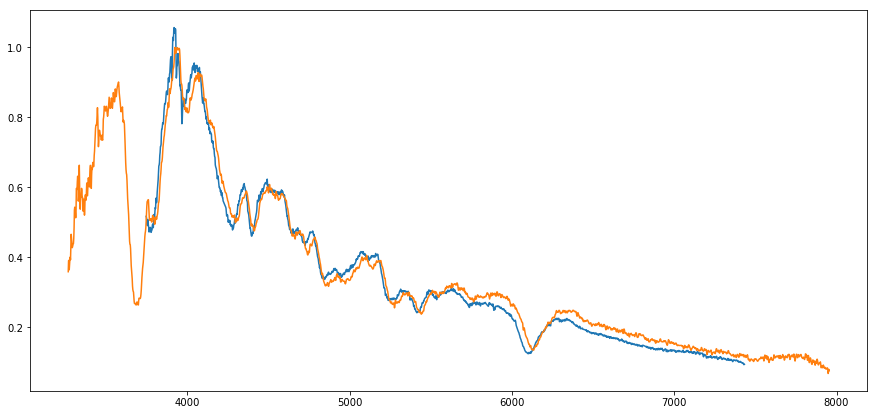

6 Twinness 0.00044167219658663564
2005el -6.73557261252
1998aq -8.44675545158


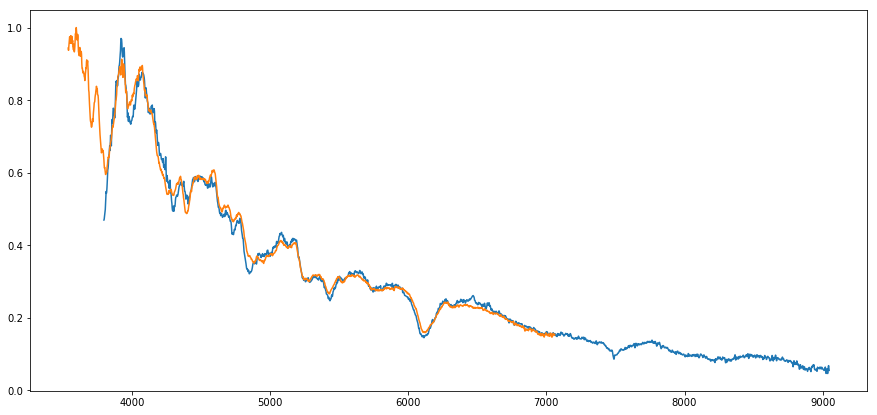

7 Twinness 0.0006848628012348077
2002cr -6.11551416683
2011fe -6.9


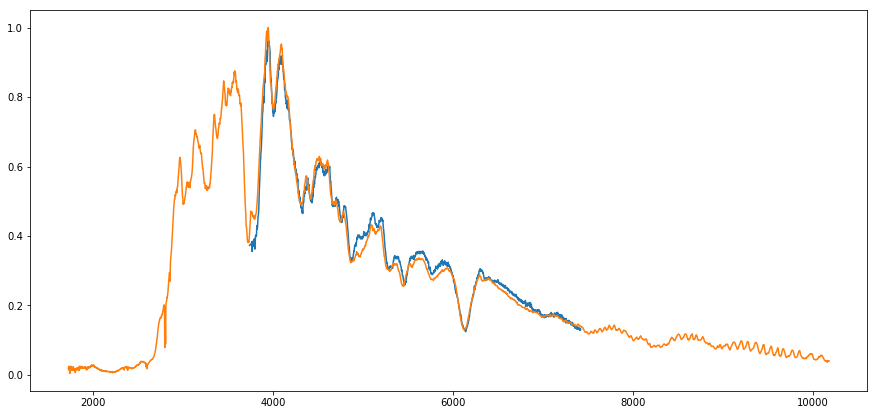

8 Twinness 0.0004305903219277093
2003du -6.3971605272
2006ax -8.34039020831


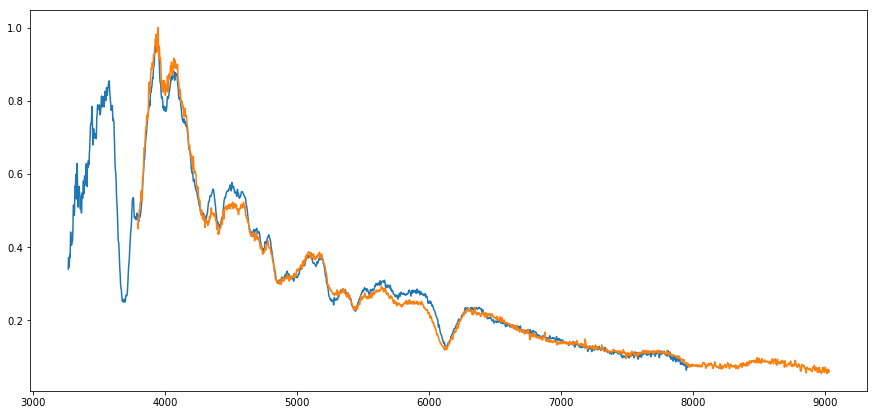

9 Twinness 0.0003484355384863322
2003kf -7.42017971228
2006lf -6.33040072798


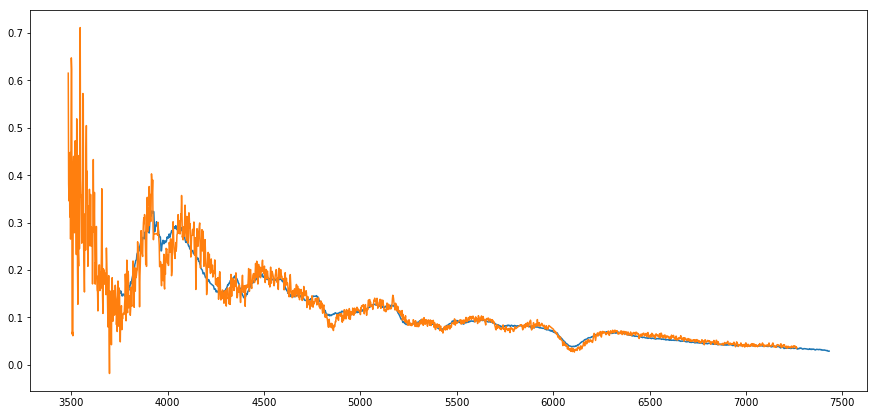

10 Twinness 0.00037763685980108443
2005cf -6.28737725555
2006ax -8.34039020831


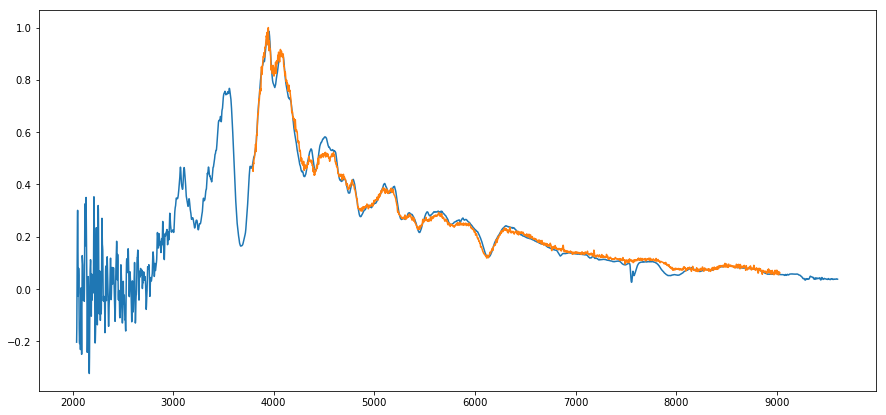

11 Twinness 0.0005980015311915404
2005el -6.73557261252
2003du -6.3971605272


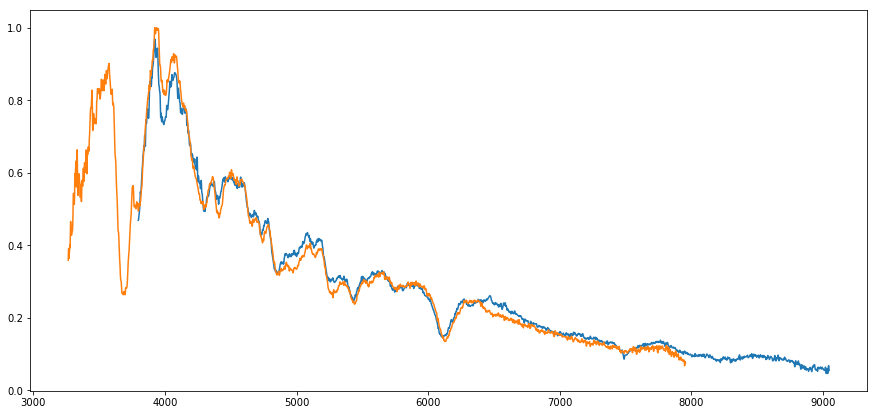

12 Twinness 0.0004998936803868228
2002cr -6.11551416683
2006lf -6.33040072798


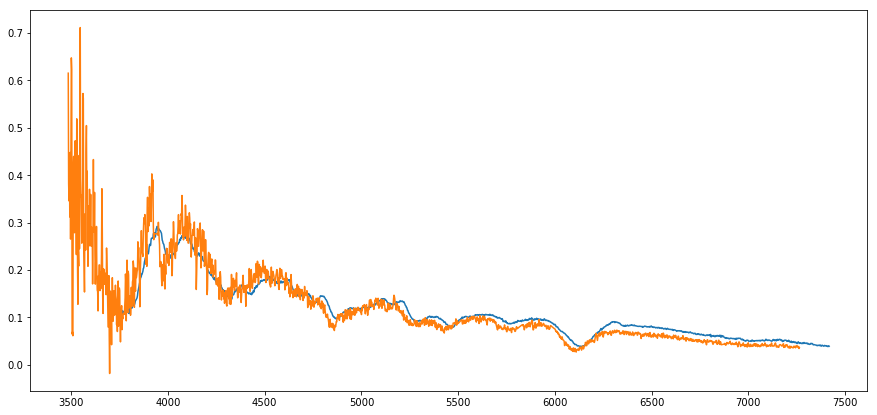

13 Twinness 0.00030586694239431
2003kf -7.42017971228
2004ey -7.04085309307


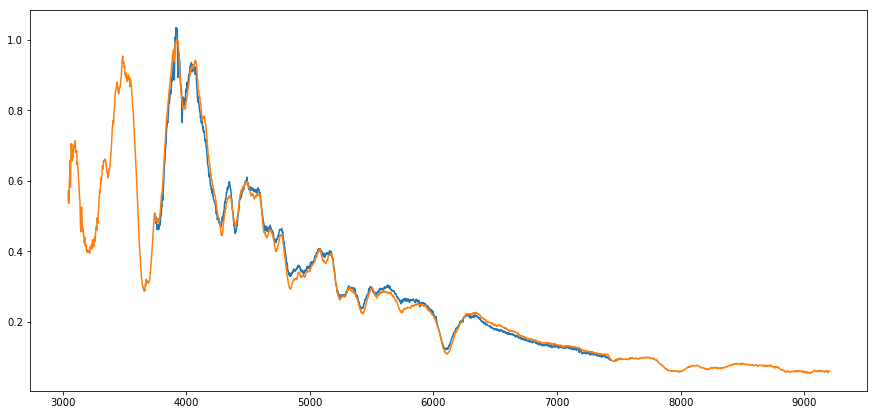

14 Twinness 0.0008655606515613859
2005el -6.73557261252
2006ax -8.34039020831


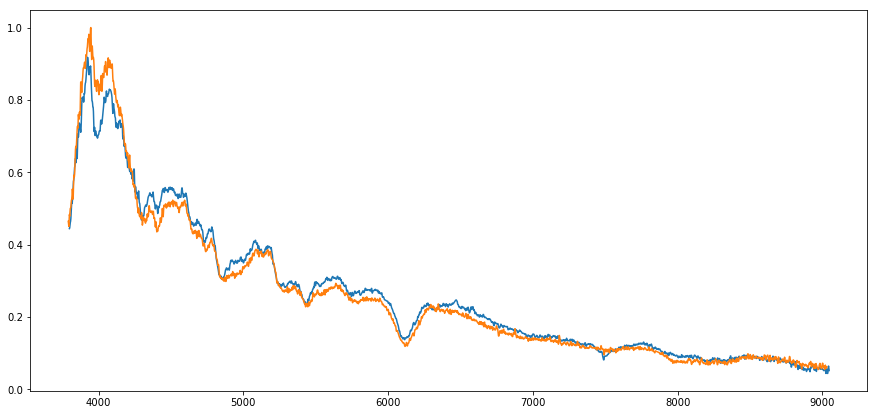

15 Twinness 0.0005318936787921417
1999dk -6.86135414204
1997do -6.76553280798


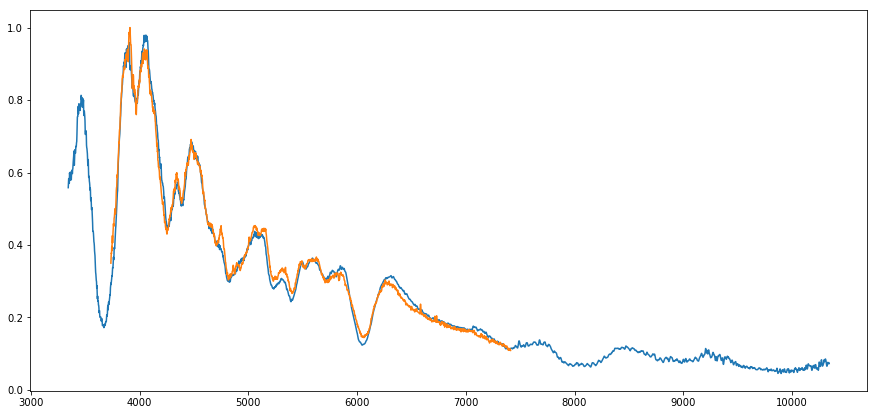

16 Twinness 0.0009193640965636205
2002dj -7.3994965291
2006cp -6.09318891233


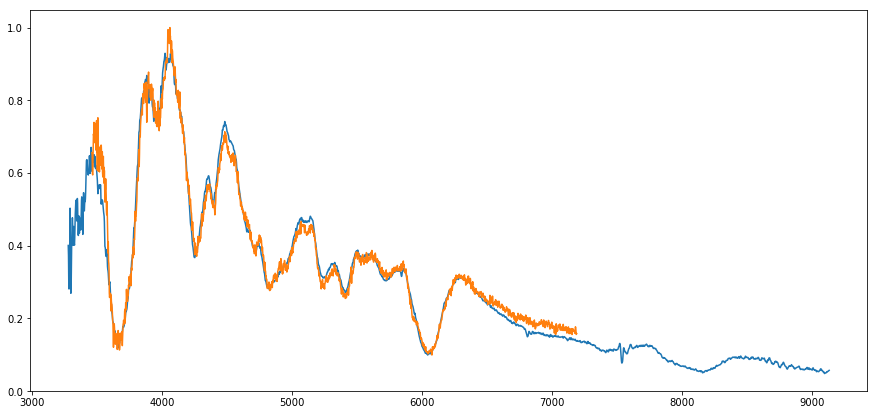

17 Twinness 0.0002941895623214087
2005el -6.73557261252
2006lf -6.33040072798


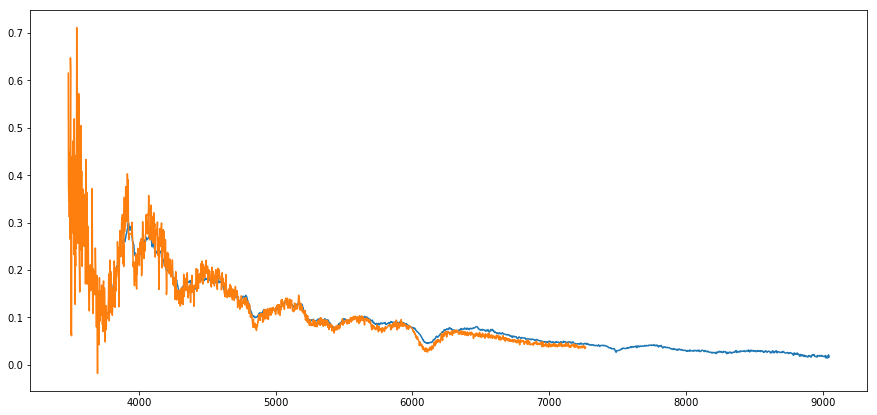

18 Twinness 0.000498274858361988
2000fa -8.18976279651
1997do -6.76553280798


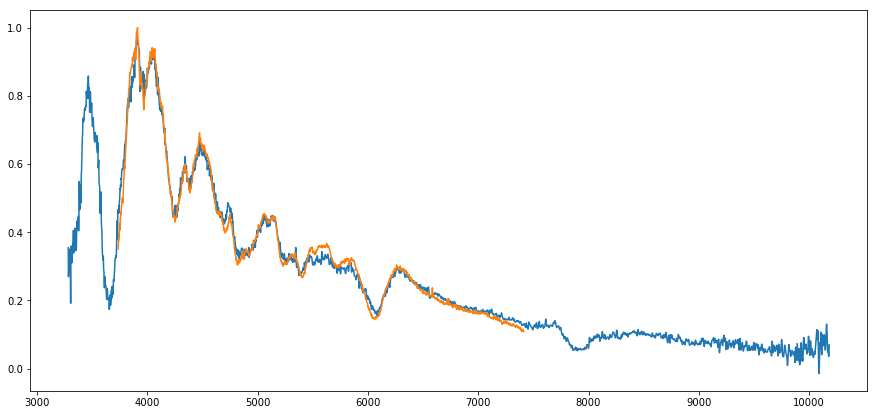

19 Twinness 0.0003041885718437444
1994d -8.56836630215
2006lf -6.33040072798


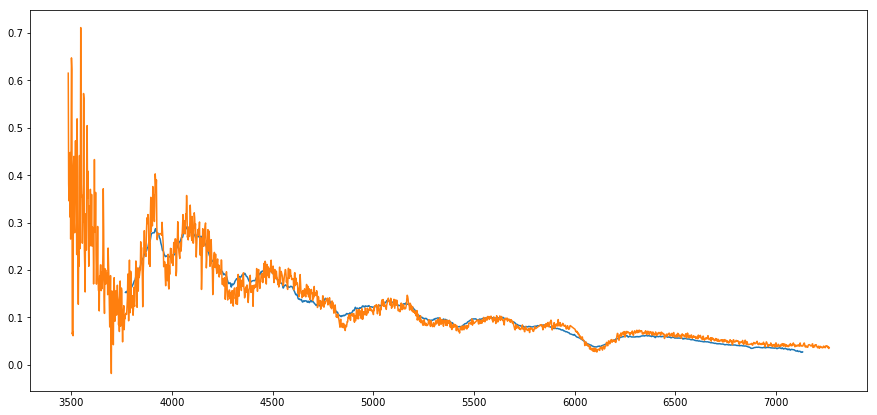

In [99]:
ms = []
for key in comparisons.keys():
    c = comparisons[key]
    ms.append(c[1])

cutoff = np.percentile(ms, [1])
# cutoff = np.percentile(ms, [97])
count = 0
pairs = []
pair_metrics = []
for key in comparisons.keys():
    c = comparisons[key]
    if c[1] < cutoff:
        count+=1
        print count, 'Twinness', c[1]
        print c[2].name, c[2].phase
        print c[3].name, c[3].phase
        plt.figure(figsize=[15,7])
        plt.plot(c[2].wavelength[c[2].x1:c[2].x2],c[0]*c[2].flux[c[2].x1:c[2].x2])
        plt.plot(c[3].wavelength[c[3].x1:c[3].x2],c[3].flux[c[3].x1:c[3].x2])
        plt.show()

In [100]:
# name1 = '2006ax'
# name2 = '2003du'
# name1 = '1999aa'
# name2 = '2005eq'
# name1 = '1994s'
# name2 = '2003du'

#identical at 40 days
# name1 = '2002bo'
# name2 = '2007le'

name1 = '2005el'
name2 = '1998aq'
pair_query = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where Spectra.SN in ('{}', '{}')".format(name1,name2)]
spec_array = kpora.grab(pair_query[0], 'x1', make_corr=True, verbose=True)


Using: ../data/kaepora_v1.1.db
49 Total Spectra found
0 flagged spectra removed 49 spectra left
0 spectra of peculiar Ias removed 49 spectra left
49 spectra of SNe that have host reddening corrections
Arrays cleaned
Name Filename Source SNR Phase MJD MJD_max z Host Morphology Minwave Maxwave
1998aq sn1998aq-19980618-ui.flm bsnip 181.384165127 51.3928976715 50982.321 50930.738 0.003699 12.0 3340.0 10310.0
1998aq sn1998aq-19980717-ui.flm bsnip 54.7785141474 80.206316834 51011.241 50930.738 0.003699 12.0 3390.0 10310.0
1998aq sn1998aq-19980723-ui.flm bsnip 45.6721856385 86.1772304247 51017.234 50930.738 0.003699 12.0 3320.0 10112.0
2005el sn2005el-20050926.496-ui-corrected.flm bsnip 98.3704190706 -6.56215822093 53639.496 53646.156 0.01491 8.0 3310.0 10294.0
2005el sn2005el-20051004.534-ui-corrected.flm bsnip 73.6806853209 1.35775586012 53647.534 53646.156 0.01491 8.0 3322.0 10294.0
2005el sn2005el-20051011.512-ui-corrected.flm bsnip 115.371347271 8.23324235646 53654.512 53646.156 0.01491 

In [101]:
sn1_array = []
sn2_array = []
phase1_array = []
phase2_array = []
for spec in spec_array:
    if spec.name == name1:
        sn1_array.append(spec)
        phase1_array.append(spec.phase)
    else:
        sn2_array.append(spec)
        phase2_array.append(spec.phase)
sn1_array = np.asarray(sn1_array)
sn2_array = np.asarray(sn2_array)

-6.73557261252 -8.44675545158


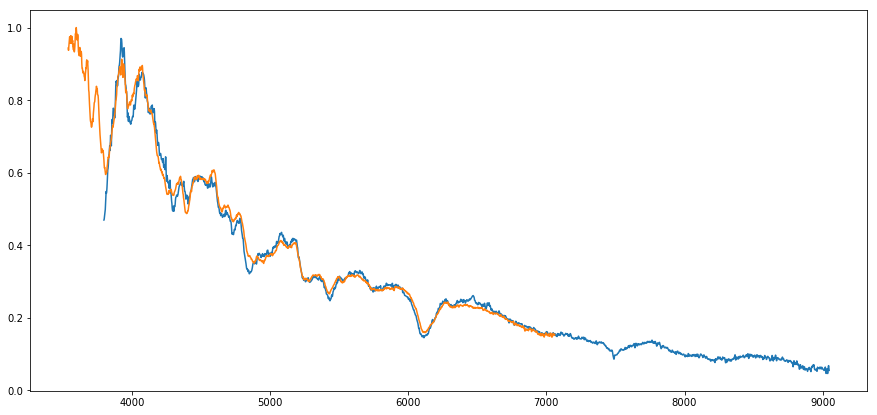

-6.56215822093 -8.44675545158


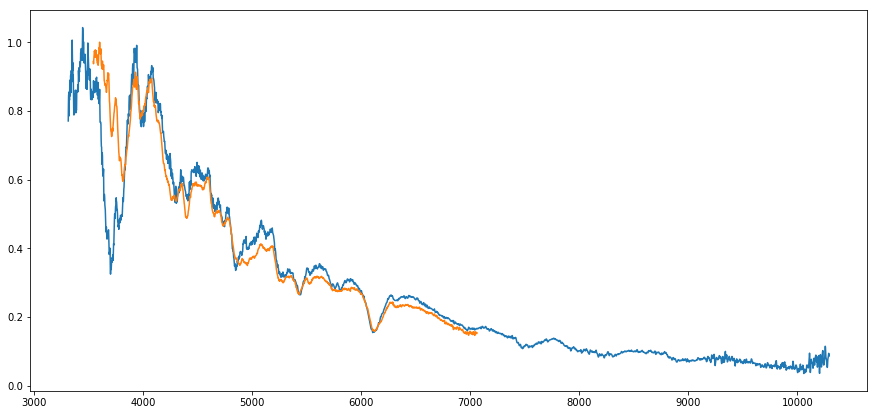

-4.61715817166 -3.35558768116


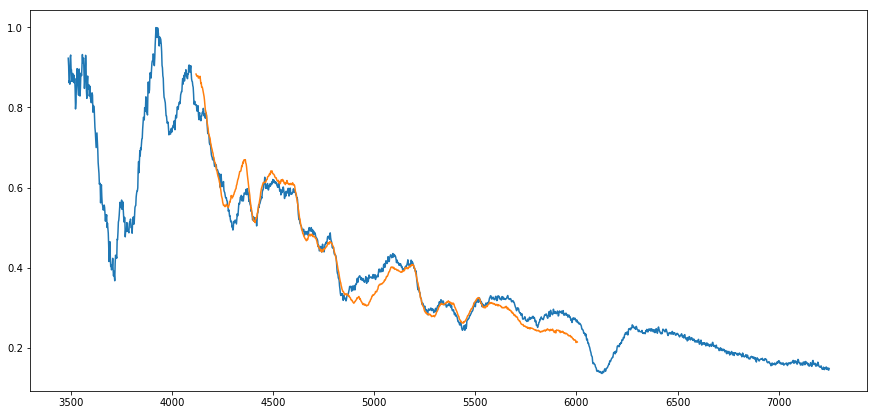

-3.62199603906 -3.35558768116


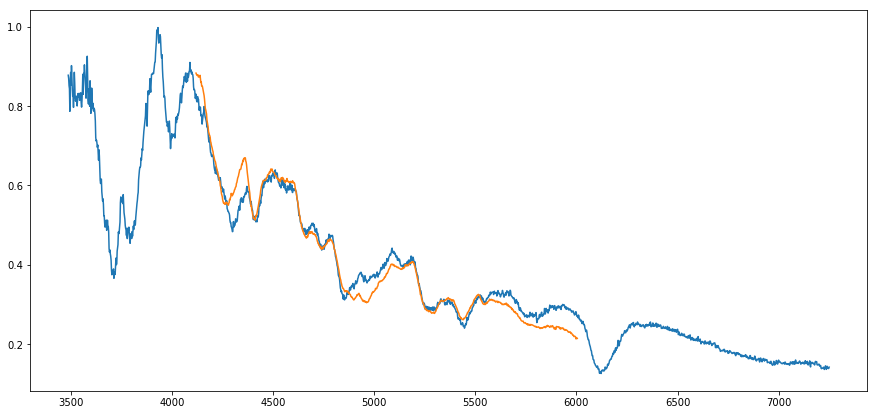

1.35775586012 -0.446348955211


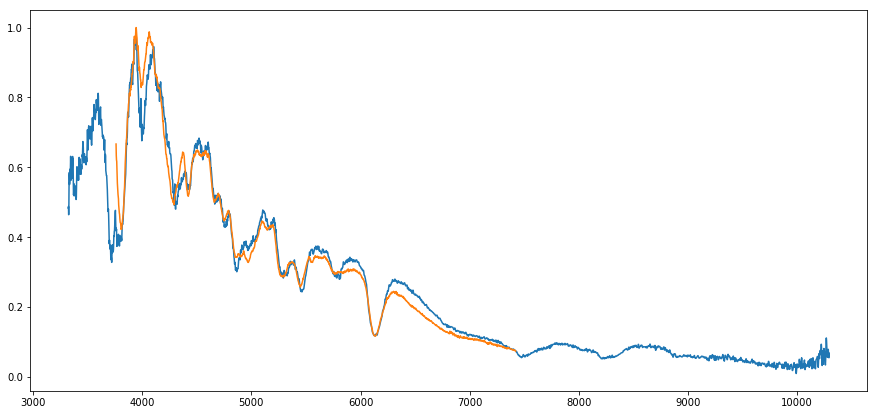

1.35775586012 0.520076238


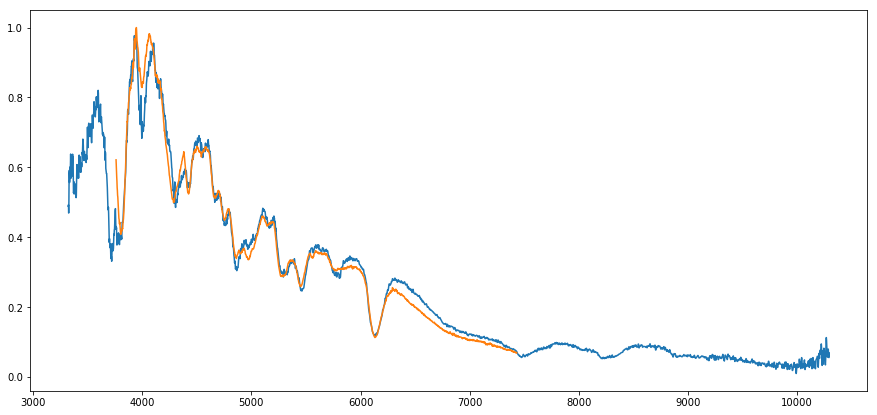

1.35775586012 1.51639087018


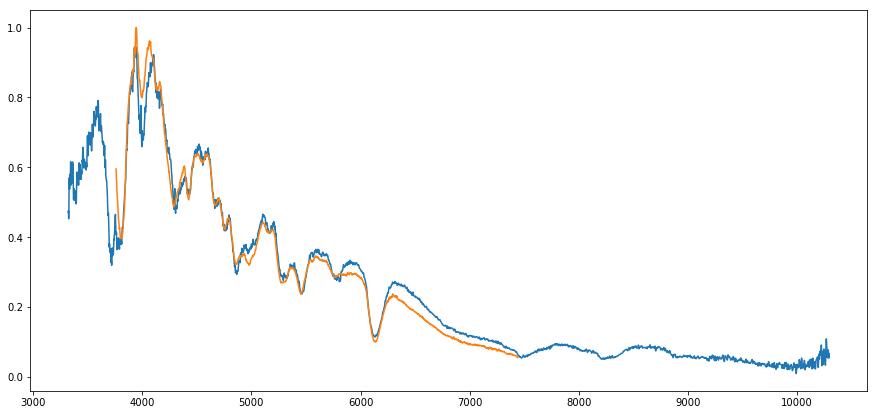

1.35775586012 2.4927792097


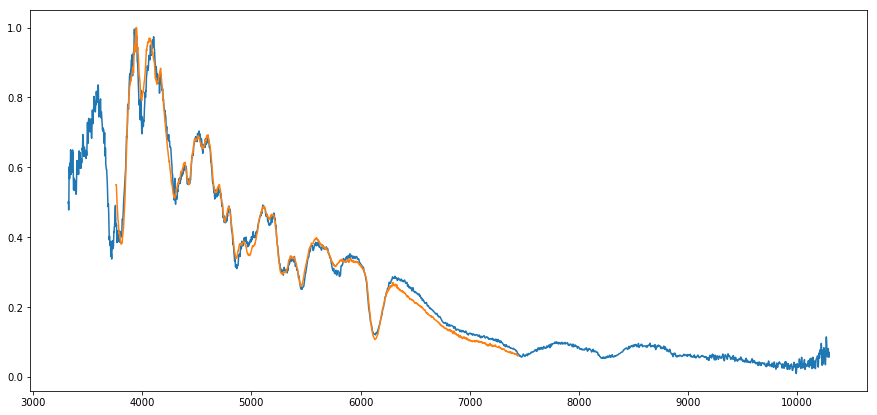

2.1913273097 0.520076238


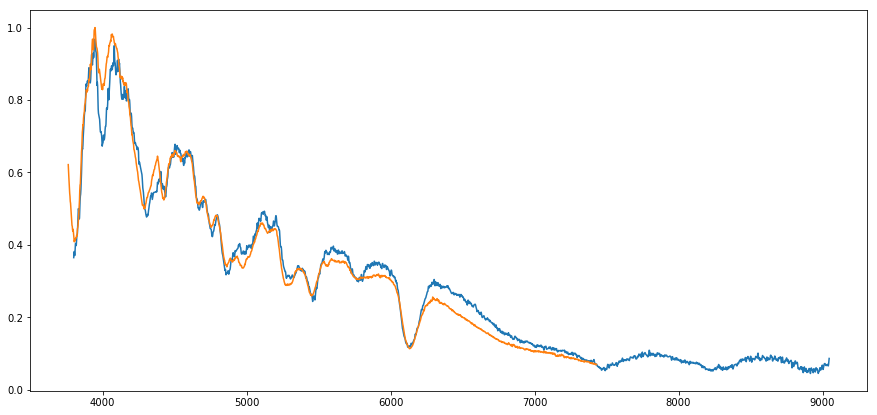

2.1913273097 1.51639087018


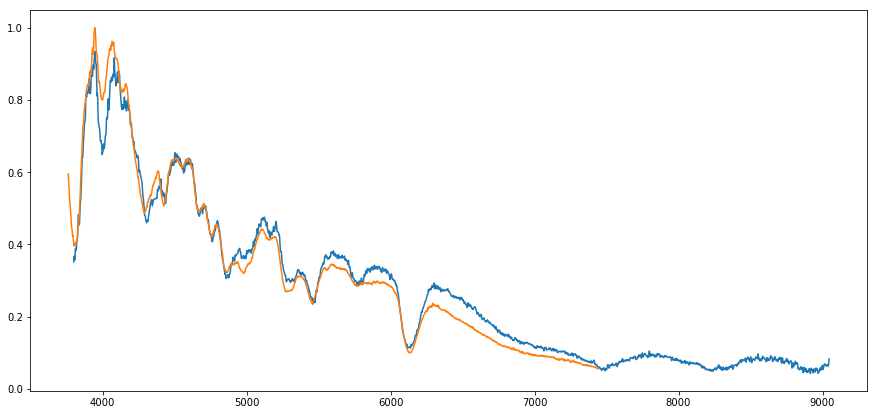

2.1913273097 2.4927792097


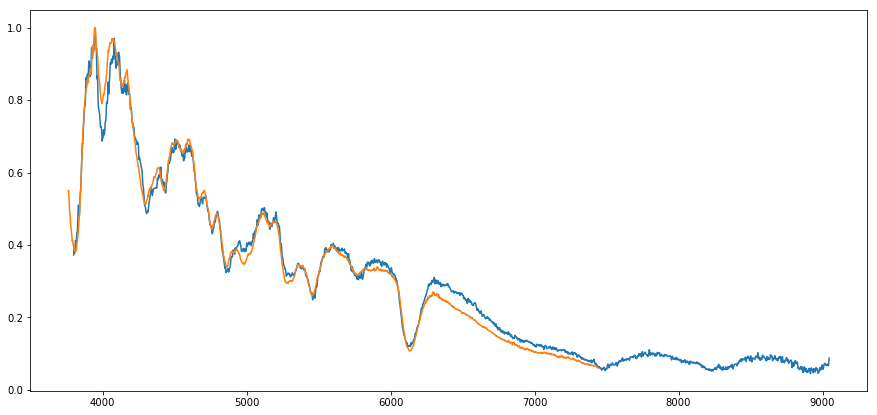

2.1913273097 3.4990569882


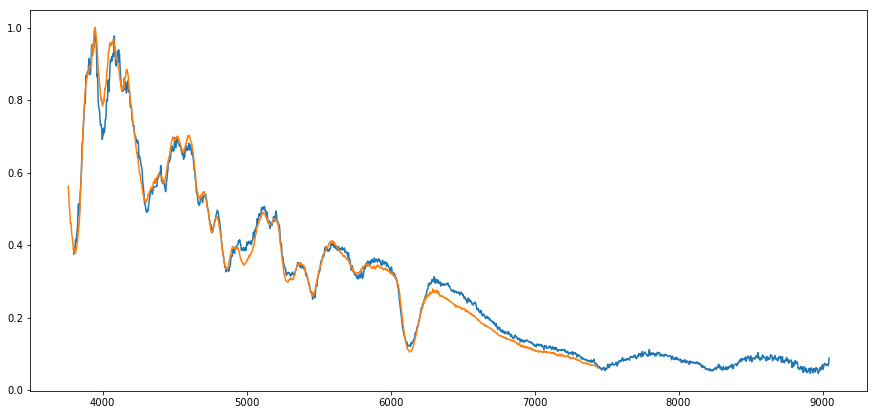

2.29971130445 0.520076238


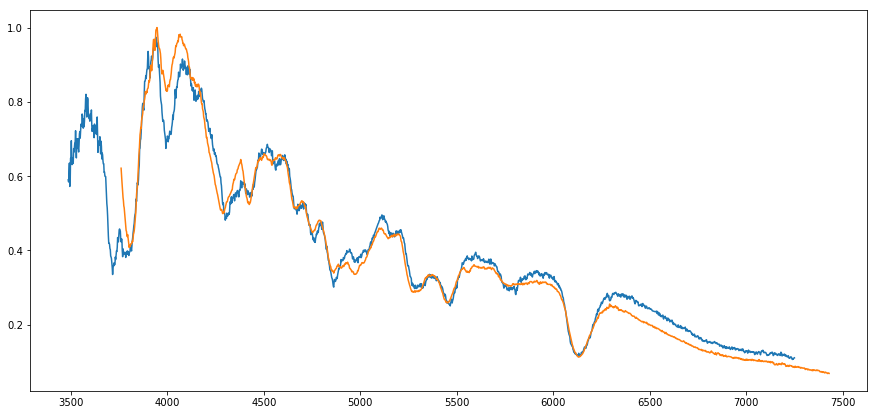

2.29971130445 1.51639087018


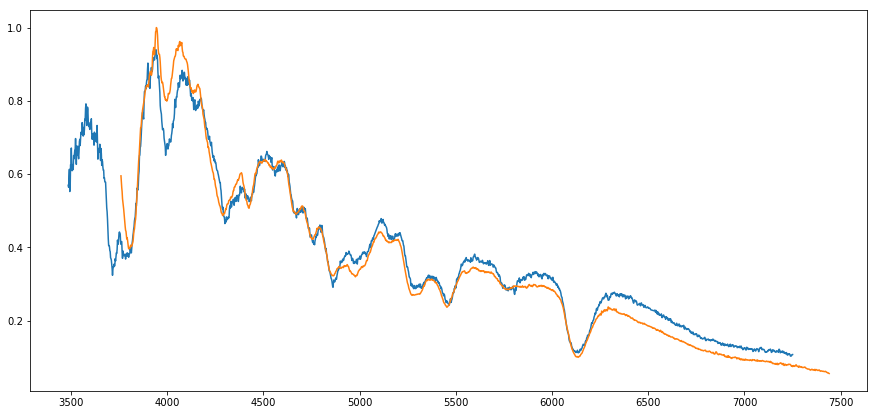

2.29971130445 2.4927792097


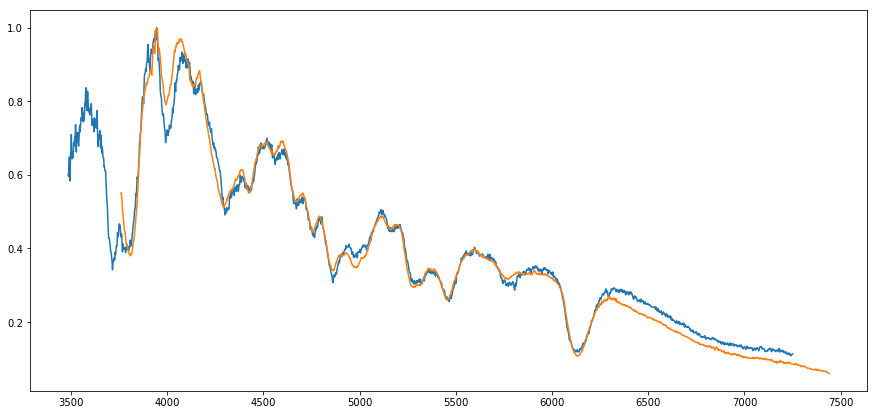

2.29971130445 3.4990569882


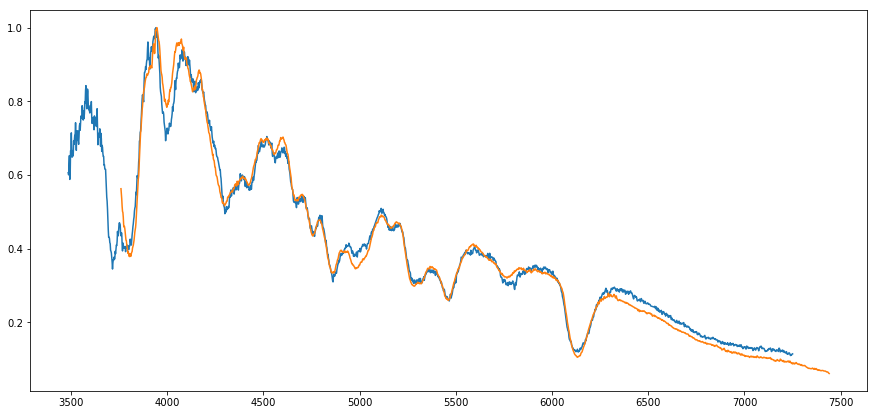

4.26047629839 2.4927792097


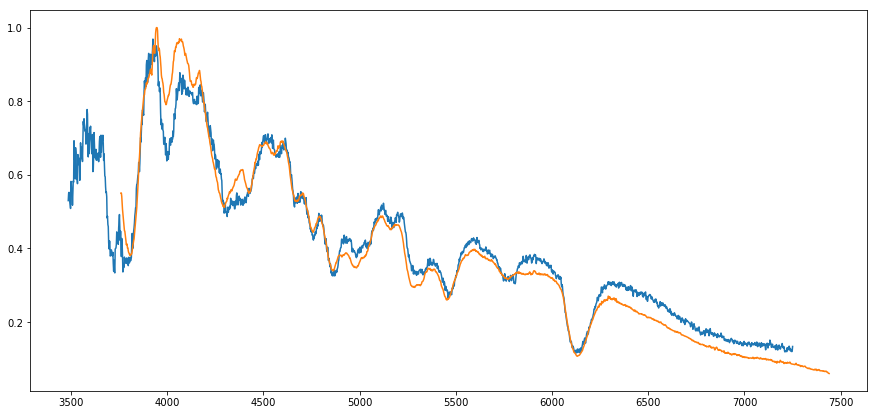

4.26047629839 3.4990569882


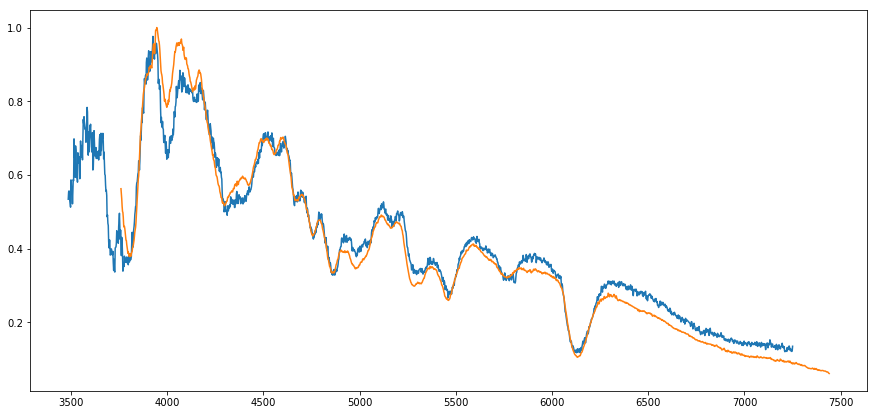

4.26047629839 4.47544532774


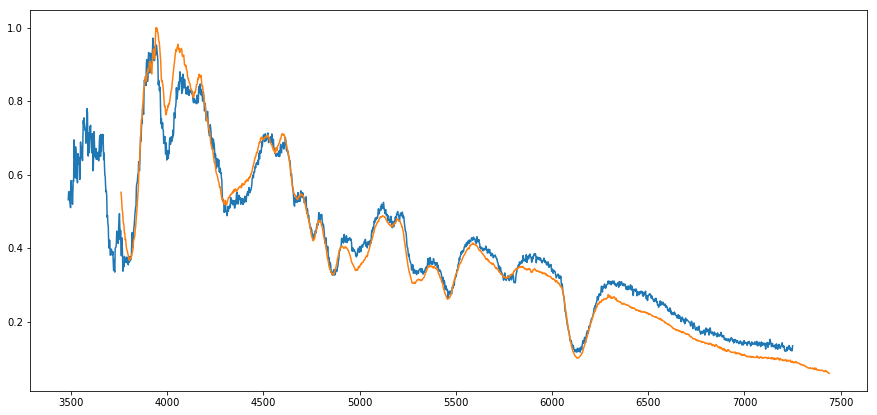

4.26047629839 5.48172310623


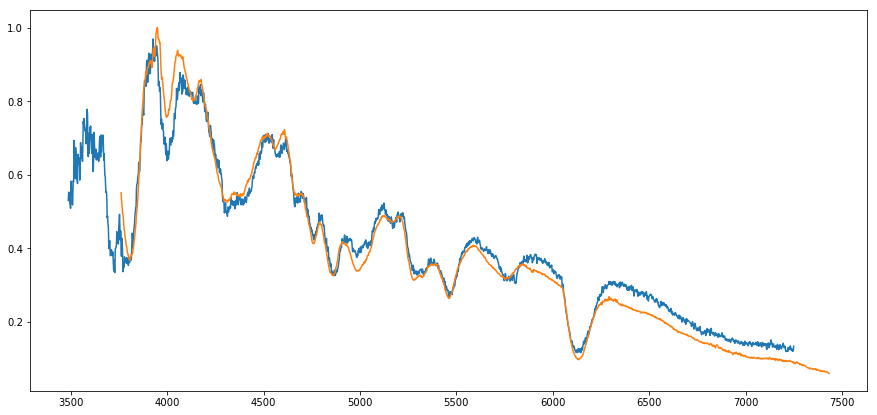

8.23324235646 6.49796403105


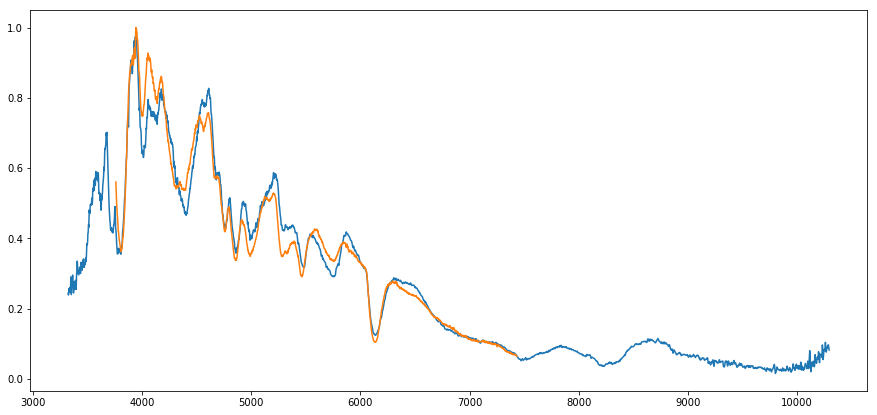

29.7996866717 30.369662618


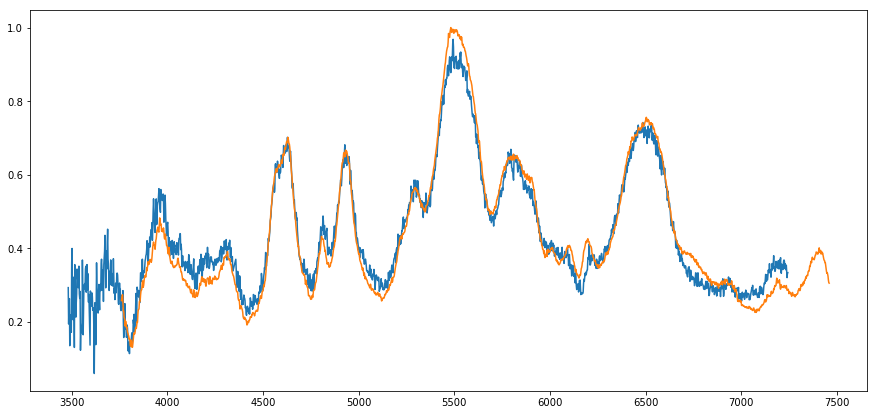

29.7996866717 31.3360878112


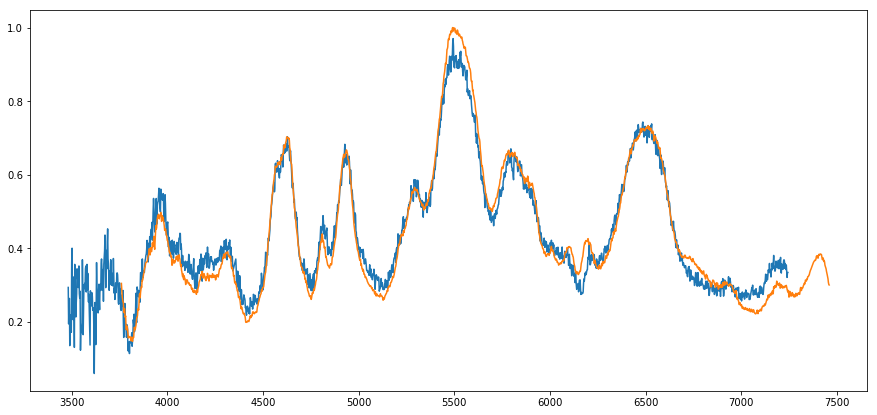

59.3885172084 59.2229343658


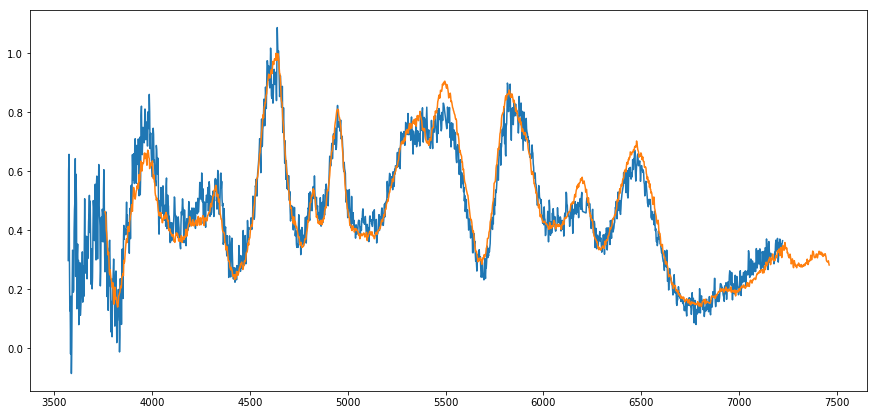

In [102]:
spec_comparisons = []
sort = np.argsort(phase1_array)

for spec1 in sn1_array[sort]:
    for spec2 in sn2_array: 
        if np.absolute(spec1.phase - spec2.phase) < 2:
            print spec1.phase, spec2.phase
            output = composite.optimize_scales([spec1], spec2, True, correct=False)
            scale = output[1][0]
            plt.figure(figsize=[15,7])
            plt.plot(spec1.wavelength[spec1.x1:spec1.x2],scale*spec1.flux[spec1.x1:spec1.x2])
            plt.plot(spec2.wavelength[spec2.x1:spec2.x2],spec2.flux[spec2.x1:spec2.x2])
            plt.show()
            